# Task 4: Predicting Insurance Claim Amounts

## 📌 Objective

To estimate the medical insurance claim amount (charges) based on personal data using a *Linear Regression* model.

We aim to:
- Understand how features like age, BMI, and smoking status impact medical costs
- Visualize relationships between features and charges
- Evaluate model accuracy using MAE and RMSE

In [32]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [33]:
# 2. Load Dataset
df = pd.read_csv('insurance.csv')  

In [34]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 📁 Dataset Description

*Dataset Name:* Medical Cost Personal Dataset

*Features include:*
- age: Age of the insured person
- sex: Gender of the insured person
- bmi: Body Mass Index
- children: Number of children/dependents covered
- smoker: Smoking status (yes/no)
- region: Residential area in the US
- charges: Medical insurance cost (target variable)

This dataset helps explore how demographic and lifestyle variables influence insurance charges.

In [35]:
# 3. Initial Exploration
print("Shape:", df.shape)
print(df.head())
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Shape: (1338, 7)
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
 age         0
sex         0
bmi         0
children    0


In [36]:
# 4. Data Summary
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## 📊  Exploratory Data Analysis (EDA)

We used scatter plots to explore how age and bmi relate to charges, and a boxplot to see how smoker status affects charges. A correlation heatmap was added after encoding.

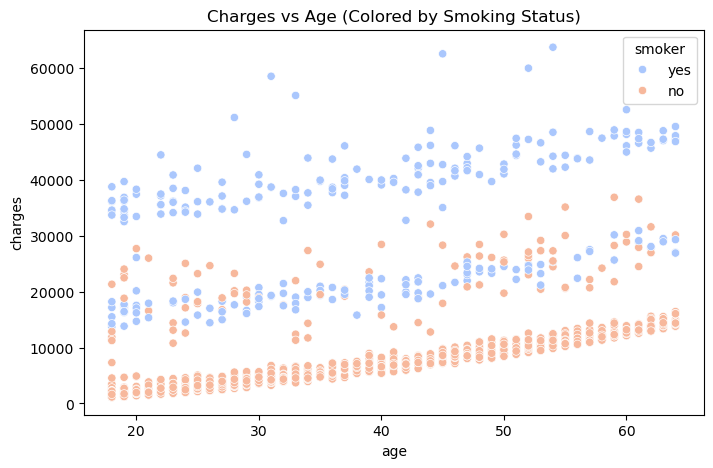

In [37]:
# 5. Visualizations

# Charges vs Age
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title("Charges vs Age (Colored by Smoking Status)")
plt.show()

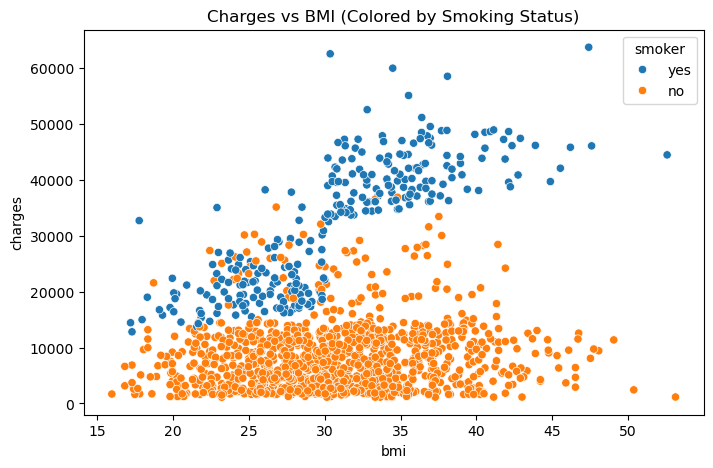

In [38]:
# Charges vs BMI
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Charges vs BMI (Colored by Smoking Status)")
plt.show()

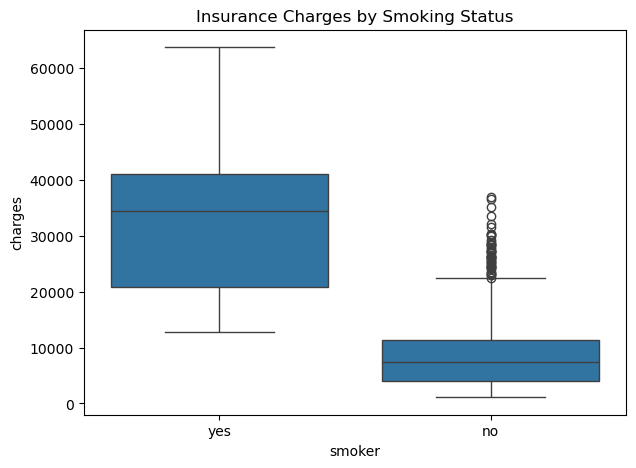

In [39]:
# Boxplot of Charges by Smoker
plt.figure(figsize=(7,5))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges by Smoking Status")
plt.show()

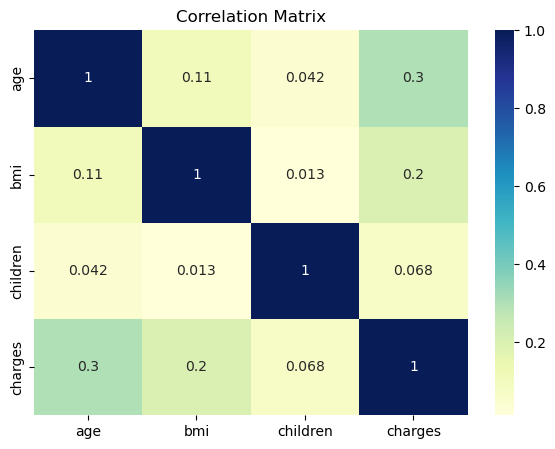

In [40]:
# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()

In [41]:
# 6. Encode Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True)

In [42]:
# 7. Split Data
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# 8. Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# 9. Predict and Evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ MAE: ${mae:.2f}")
print(f"✅ RMSE: ${rmse:.2f}")

✅ MAE: $4181.19
✅ RMSE: $5796.28


## 📌 Conclusion

- *Charges increase* with age and bmi, especially for *smokers*
- *Correlation heatmap* confirms expected feature relationships
- *Model results*:
  - MAE ≈ ~$4181.19  
  - RMSE ≈ ~$5796.28 

The Linear Regression model performs reasonably well. For improved results, more advanced models like Random Forest or XGBoost could be considered.
